In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

In [3]:
candidates.keys()

dict_keys(['gmat', 'gpa', 'work_experience', 'admitted'])

In [4]:
df = pd.DataFrame(candidates, columns = candidates.keys())

In [5]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [6]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [7]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


# EDA

<AxesSubplot:xlabel='gmat', ylabel='work_experience'>

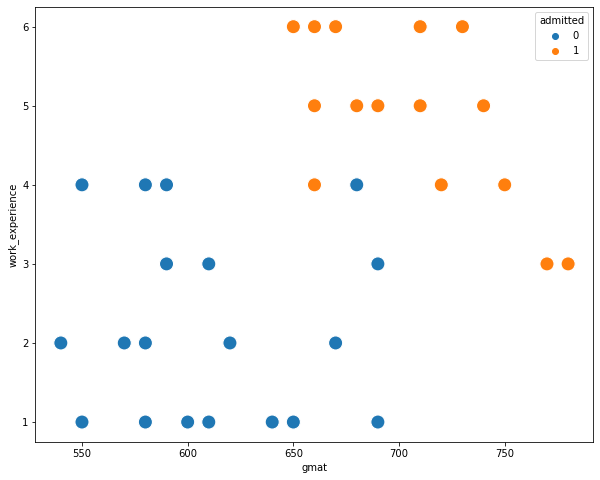

In [8]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'gmat', y = 'work_experience', hue = 'admitted', data = df,s = 200)

<AxesSubplot:xlabel='gmat', ylabel='gpa'>

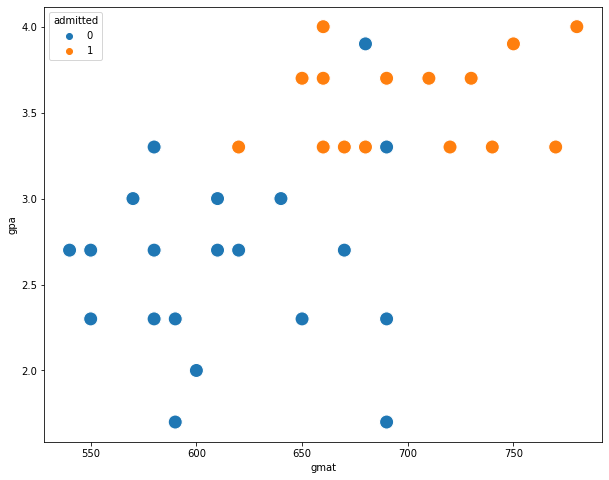

In [9]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'gmat', y = 'gpa', hue = 'admitted', data = df, s = 200)

<AxesSubplot:xlabel='gpa', ylabel='work_experience'>

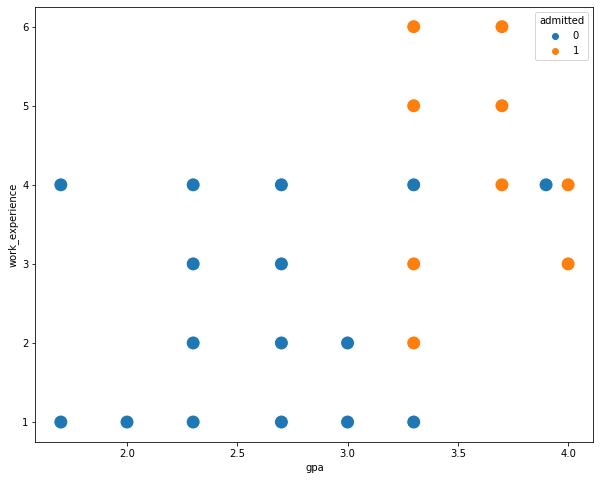

In [10]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'gpa', y = 'work_experience', hue = 'admitted', data = df, s = 200)

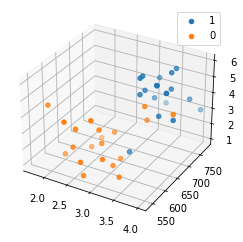

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

for s in df.admitted.unique():
    ax.scatter(df.gpa[df.admitted == s], df.gmat[df.admitted == s], [df.work_experience[df.admitted == s]], label =s)
    
ax.legend()

In [12]:
X = df.iloc[:,:-1]
y = df['admitted']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# Model

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train,y_train)
y_pred = logistic_regressor.predict(X_test)

In [15]:
logistic_regressor.coef_

array([[0.04202829, 0.64501892, 1.25507308]])

In [16]:
logistic_regressor.intercept_

array([-34.34092555])

Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)
y_pred_r_clf = r_clf.predict(X_test)

# Evaluation Metric

In [30]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, confusion_matrix, f1_score, accuracy_score

In [39]:
print('Accuracy score of Logistic regression model is {}'.format(accuracy_score(y_pred,y_test)))
print('Accuracy score of Decision tree is {}'.format(accuracy_score(y_pred_dtree, y_test)))
print('Accuracy score of Random forest classifier is {}'.format(accuracy_score(y_pred_r_clf, y_test)))

Accuracy score of Logistic regression model is 0.625
Accuracy score of Decision tree is 0.75
Accuracy score of Random forest classifier is 0.625


In [41]:
print('F1 score of Logistic regression model is {}'.format(f1_score(y_pred,y_test)))
print('F1 score of Decision tree is {}'.format(f1_score(y_pred_dtree, y_test)))
print('F1 score of Decision tree is {}'.format(f1_score(y_pred_r_clf, y_test)))

F1 score of Logistic regression model is 0.4
F1 score of Decision tree is 0.5
F1 score of Random forest classifier is 0.4


In [18]:
confusion_matrix(y_pred, y_test)

array([[4, 1],
       [2, 1]], dtype=int64)

C:\Users\enoch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\enoch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\enoch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

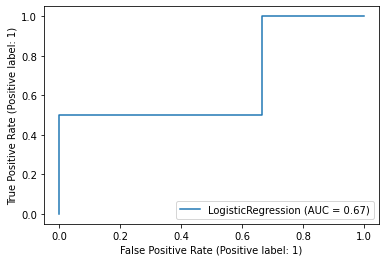

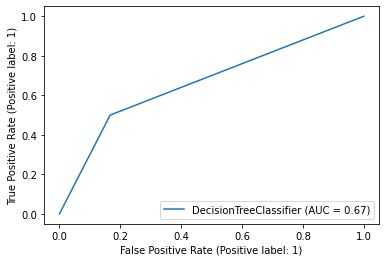

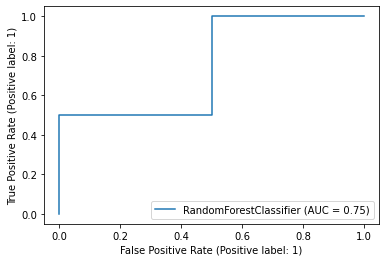

In [44]:
plot_roc_curve(logistic_regressor, X_test, y_test)
plot_roc_curve(dtree, X_test, y_test)
plot_roc_curve(r_clf, X_test, y_test)

<AxesSubplot:xlabel='admitted', ylabel='row_0'>

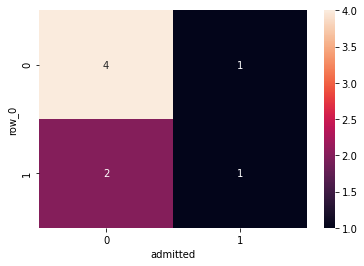

In [57]:
confusion_matrix = pd.crosstab(y_pred,y_test)
sns.heatmap(confusion_matrix, annot = True)

<AxesSubplot:xlabel='admitted', ylabel='row_0'>

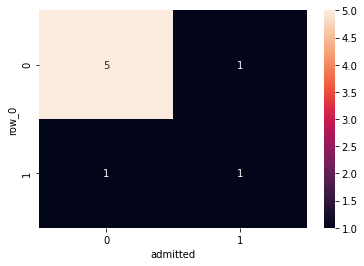

In [58]:
confusion_matrix_dtree = pd.crosstab(y_pred_dtree,y_test)
sns.heatmap(confusion_matrix_dtree, annot = True)

<AxesSubplot:xlabel='admitted', ylabel='row_0'>

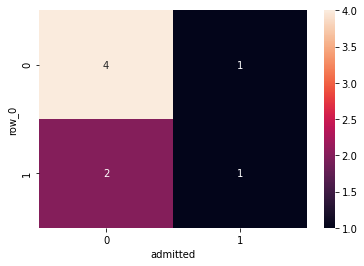

In [59]:
confusion_matrix_r_clf = pd.crosstab(y_pred_r_clf,y_test)
sns.heatmap(confusion_matrix_r_clf, annot = True)

C:\Users\enoch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


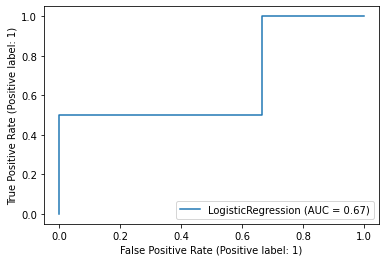

In [23]:
roc_auc_score(y_test, logistic_regressor.decision_function(X_test))

0.6666666666666667